
***
**Name**: $<$Preethi Vijai Lilly$>$ 
***


## Overview 
***


We start by importing and plotting the given data

In [264]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

### [ 70 points] Problem 1: Implementing the Logistic Regression Classifier for Binary Classification
***

In [323]:
import matplotlib.pylab as plt
%matplotlib inline
import pickle, gzip       
import numpy as np

class Numbers:
    """
    Class to store MNIST data for images of 9 and 8 only
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        train_indices = np.where(self.train_y > 7)
        self.train_x, self.train_y = self.train_x[train_indices], self.train_y[train_indices]
        self.train_y = self.train_y - 8
 
        self.valid_x, self.valid_y = valid_set
        valid_indices = np.where(self.valid_y > 7)
        self.valid_x, self.valid_y = self.valid_x[valid_indices], self.valid_y[valid_indices]
        self.valid_y = self.valid_y - 8

In [324]:
data = Numbers('./mnist.pklz')

In [325]:
from collections import defaultdict
class LogReg:
    
    def __init__(self, X, y, eta = 0.1):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: Learning rate (the default is a constant value)
        :method: This should be the name of the method (sgd_update or mini_batch_descent)
        :batch_size: optional argument that is needed only in the case of mini_batch_descent
        """
        self.X = X
        self.y = y
        self.w =[]
        #self.w = np.zeros(X.shape[1]) # can remove from here and ask to be defined in the function
        self.eta = eta
        
    def calculate_score(self, x):
        """
        :param x: This can be a single training example or it could be n training examples
        :return score: Calculate the score that you will plug into the logistic function
        """
        # TODO: Compute the score to be fed to the sigmoid function
        scores = np.dot(x, self.w)
        return scores
        
    
    def sigmoid(self, score):
        """
        :param score: Either a real valued number or a vector to convert into a number between 0 and 1
        :return sigmoid: Calcuate the output of applying the sigmoid function to the score. This could be a single
        value or a vector depending on the input
        """
        # TODO: Complete this function to return the output of applying the sigmoid function to the score
        return 1 / (1 + np.exp(-score))
        
    
    def compute_gradient(self, x, h, y):
        """
        :param x: Feature vector
        :param h: predicted class label
        :param y: real class label
        :return gradient: Return the derivate of the cost w.r.t to the weights
        """
        # TODO: Finish this function to compute the gradient

        gradient = np.dot((h - y),x) 
        return gradient
        
     
    def sgd_update(self):
        """
        Compute a stochastic gradient update over the entire dataset to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :return: Return the new value of the regression coefficients
        """ 
        # TODO: Finish this function to do a stochastic gradient descent update over the entire dataset
        # and return the updated weight vector
        self.w = np.zeros(self.X.shape[1])
        for i in range(len(self.X)):
            z = self.calculate_score(self.X[i])
            h = self.sigmoid(z)
            gradient = self.compute_gradient(self.X[i],h,self.y[i])
            self.w -= self.eta * gradient
        return self.w

    
    def mini_batch_update(self, batch_size):
        """
        One iteration of the mini-batch update over the entire dataset (one sweep of the dataset).
        :param X: NumPy array of features (size : no of examples X features)
        :param y: Numpy array of class labels (size : no of examples X 1)
        :param batch_size: size of the batch for gradient update
        :returns w: Coefficients of the classifier (after updating)
        """
        # TODO: Performing mini-batch training follows the same steps as in stochastic gradient descent,
        # the only major difference is that we’ll use batches of training examples instead of one. 
        # Here we decide a batch size, which is the number of examples that will be fed into the 
        # computational graph at once.
        X_batch_li = list()
        y_batch_li = list()
    
        for i in range(len(self.y) // batch_size):
            X_batch_li.append(self.X[i * batch_size : i * batch_size + batch_size])
            y_batch_li.append(self.y[i * batch_size : i * batch_size + batch_size])
        
    
        if len(self.y) % batch_size > 0:
            X_batch_li.append(self.X[len(self.y) // batch_size * batch_size:, :])
            y_batch_li.append(self.y[len(self.y) // batch_size * batch_size:])
            
        n_batches = len(y_batch_li)
        

        self.w = np.zeros(X_batch_li[0].shape[1])
        for i in range(n_batches):
            
            X_batch = X_batch_li[i]
            y_batch = y_batch_li[i]
            z = self.calculate_score(X_batch)
        
            h = self.sigmoid(z)
            gradient = self.compute_gradient(X_batch,h,y_batch)
            self.w -= self.eta * gradient
        return self.w
          
        
     
    
    def progress(self, test_x, test_y, update_method, *batch_size):
        """
        Given a set of examples, computes the probability and accuracy
        :param test_x: The features of the test dataset to score
        :param test_y: The features of the test 
        :param update_method: The update method to be used, either 'sgd_update' or 'mini_batch_update'
        :param batch_size: Optional arguement to be given only in case of mini_batch_update
        :return: A tuple of (log probability, accuracy)
        """
        # TODO: Complete this function to compute the predicted value for an example based on the logistic value
        # and return the log probability and the accuracy of those predictions
        self.X = test_x
        self.y = test_y
        result = ()
        log_prob=0
        X_batch = list()
        y_batch = list()
        preds=np.zeros(test_y.shape)
        if update_method == 'sgd_update':
            self.w = np.zeros(test_x.shape[1])
            for i in range(len(test_x)):
                z = self.calculate_score(test_x[i])
                h = self.sigmoid(z)
                if h>= 0.5:
                    preds[i]=1
                else:
                    preds[i]=0
                gradient = self.compute_gradient(self.X[i],h,self.y[i])
                self.w -= self.eta * gradient
                log_prob += np.sum( test_y*z - np.log(1 + np.exp(z)) )
        else:
            
            X_batch_li = list()
            y_batch_li = list()
            batch_size=batch_size[0]
    
            for i in range(len(self.y) // batch_size):
                X_batch_li.append(self.X[i * batch_size : i * batch_size + batch_size])
                y_batch_li.append(self.y[i * batch_size : i * batch_size + batch_size])
        
    
            if len(self.y) % batch_size > 0:
                X_batch_li.append(self.X[len(self.y) // batch_size * batch_size:, :])
                y_batch_li.append(self.y[len(self.y) // batch_size * batch_size:])
            
            n_batches = len(y_batch_li)
        

            self.w = np.zeros(X_batch_li[0].shape[1])
            k=0
            for i in range(n_batches):
            
                X_batch = X_batch_li[i]
                y_batch = y_batch_li[i]
                z = self.calculate_score(X_batch)
                h = self.sigmoid(z)
                for j in range(len(h)):
                    if h[j]>= 0.5:
                        preds[k]=1
                    else:
                        preds[k]=0
                    k += 1
                    
                gradient = self.compute_gradient(X_batch,h,y_batch)
                self.w -= self.eta * gradient
                log_prob += np.sum( test_y[i]*z - np.log(1 + np.exp(z)))


        accuracy = ((preds == self.y).sum().astype(int) / len(preds))
        result=(log_prob,accuracy)
        return result
        
     

In [326]:
import unittest

class LogRegTester(unittest.TestCase):
    def setUp(self):
        self.X = np.array([[0.1, 0.3 ], [0.4, 0.6], [0.8, 0.1], [0.8, 0.1], [0.5, 0.8]])
        self.y = np.array([0,  0, 1, 1,  0])
        self.log_reg_classifier_1 = LogReg(self.X, self.y, 0.5)
        self.log_reg_classifier_2 = LogReg(self.X, self.y, 0.5)
        
    def test_sgd_update(self):
        """
        Test sgd_update function from LogReg
        """
        weights = self.log_reg_classifier_1.sgd_update()
        self.assertEqual(round(weights[0], 2), 0.16)
        self.assertEqual(round(weights[1], 2), -0.37)
        
    def tests_mini_batch_update(self):
        """
        Test mini_batch_update function from LogReg
        """
        weights = self.log_reg_classifier_2.mini_batch_update(2)
        self.assertEqual(round(weights[0], 2), 0.17)
        self.assertEqual(round(weights[1], 2), -0.37)
        
    def tests_progress_sgd_update(self):
        """
        Test progress function from LogReg with method = 'sgd_update'
        """
        self.log_reg_classifier_1 = LogReg(self.X[:4], self.y[:4], 0.5)
        log_prob, accuracy = self.log_reg_classifier_1.progress(self.X[4:], self.y[4:], 'sgd_update')
        self.assertEqual(round(log_prob, 1), -0.7)  # Changed to round 1.
        self.assertEqual(accuracy, 0)
        
        
        
    
    #BEGIN Workspace
    #Add more test functions as required
    #HINT - You'll want to make sure your
    #END Workspace
    
tests = LogRegTester()
myTests = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(myTests)

...
----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

In [327]:
# DO NOT DELETE THIS CELL !!!

In [328]:
# DO NOT DELETE THIS CELL !!!

In [329]:
# DO NOT DELETE THIS CELL !!!

In [330]:
# DO NOT DELETE THIS CELL !!!

In [331]:
# DO NOT DELETE THIS CELL !!!

**Q:** After completing the class above, loop over the training data and perform ___stochastic gradient descent___ for 10 epochs, and five different values of eta range [.0001, .01, .1, .5, 1]. Train your model and do the following:

* [2.5 pts] PART A : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __training sets__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

* [2.5 pts] PART B : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __validation set__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

Don't forget to shuffle your training data after each epoch.

Implement part A below. DO NOT DELETE THE CELL

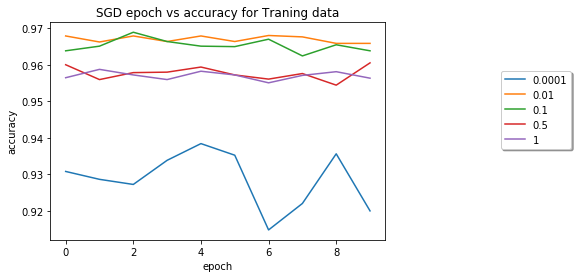

In [332]:
# YOUR CODE HERE
Numbers1 = Numbers('./mnist.pklz')
X = Numbers1.train_x
y = Numbers1.train_y
split = int(len(y)*0.8)
train_x  =X[:split]
train_y =y[:split]
validation_x = X[split:]
validation_y = y[split:]

eta=[.0001, .01, .1, .5, 1]
log_reg_classifier_1 = LogReg(train_x, train_y, 0.5)
epoch=10

fig = plt.figure()
ax = plt.axes()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("SGD epoch vs accuracy for Traning data")
for k in range(len(eta)):
    acc=np.zeros(epoch)
    x=np.zeros(epoch)
    for  i in range(epoch):
        permutations = np.random.permutation(len(train_x))
        X1, y1 = np.asarray(train_x).squeeze(), np.asarray(train_y)
        train_x = X1[permutations, :]
        train_y = y1[permutations]
        log_reg_classifier_1 = LogReg(train_x, train_y, eta[k])
        log_prob, accuracy = log_reg_classifier_1.progress(train_x, train_y, 'sgd_update')
        acc[i]=accuracy
        x[i]=i
    ax.plot(x, acc,label=eta[k])
    ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)



        #print(accuracy)

#raise NotImplementedError()

Implement part B below. DO NOT DELETE THE CELL

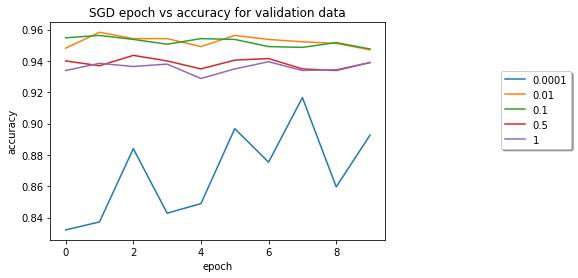

In [333]:
# YOUR CODE HERE
#raise NotImplementedError()
acc1=[]
fig = plt.figure()
ax = plt.axes()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("SGD epoch vs accuracy for validation data")
for k in range(len(eta)):
    acc1=np.zeros(epoch)
    x=np.zeros(epoch)
    for  i in range(epoch):
        permutations = np.random.permutation(len(validation_x))
        X2, y2 = np.asarray(validation_x).squeeze(), np.asarray(validation_y)
        validation_x = X2[permutations, :]
        validation_y = y2[permutations]
        log_reg_classifier_1 = LogReg(validation_x, validation_y, eta[k])
        log_prob, accuracy = log_reg_classifier_1.progress(validation_x, validation_y, 'sgd_update')
        acc1[i]=accuracy
        x[i]=i
    ax.plot(x, acc1,label=eta[k])
    ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)


**Q:** After completing the class above, loop over the training data and perform ___mini batch gradient descent___ for 10 epochs, and five different values of eta range [.0001, .01, .1, .5, 1]. Train your model and do the following:

* [2.5 pts] PART C : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __training sets__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

* [2.5 pts] PART D : Create a new classifier object and Using the `progress` method, calculate the accuracy on the __validation set__ at the end of each epoch and store it. Plot the accuracy trends for the different values of eta on same graph.

Don't forget to shuffle your training data after each epoch.

Implement part C below. DO NOT DELETE THE CELL

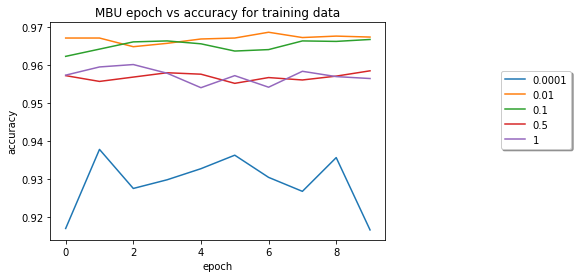

In [334]:
# YOUR CODE HERE
#raise NotImplementedError()
acc2=[]
fig = plt.figure()
ax = plt.axes()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("MBU epoch vs accuracy for training data")
for k in range(len(eta)):
    acc2=np.zeros(epoch)
    x=np.zeros(epoch)
    for  i in range(epoch):
        permutations = np.random.permutation(len(train_x))
        X1, y1 = np.asarray(train_x).squeeze(), np.asarray(train_y)
        train_x = X1[permutations, :]
        train_y = y1[permutations]
        log_reg_classifier_1 = LogReg(train_x, train_y, eta[k])
        log_prob, accuracy = log_reg_classifier_1.progress(train_x, train_y, 'mini_batch_update',2)
        acc2[i]=accuracy
        x[i]=i
    ax.plot(x, acc2,label=eta[k])
    ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)


Implement part D below. DO NOT DELETE THE CELL

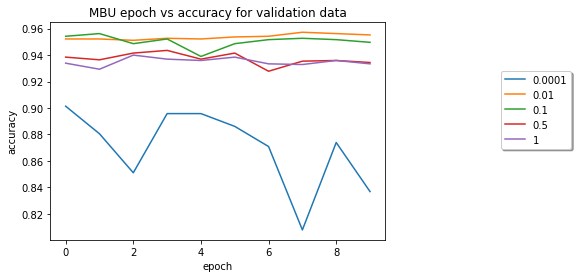

In [335]:
# YOUR CODE HERE
#raise NotImplementedError()
acc3=[]
fig = plt.figure()
ax = plt.axes()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("MBU epoch vs accuracy for validation data")
for k in range(len(eta)):
    acc3=np.zeros(epoch)
    x=np.zeros(epoch)
    for  i in range(epoch):
        permutations = np.random.permutation(len(validation_x))
        X2, y2 = np.asarray(validation_x).squeeze(), np.asarray(validation_y)
        validation_x = X2[permutations, :]
        validation_y = y2[permutations]
        log_reg_classifier_1 = LogReg(validation_x, validation_y, eta[k])
        log_prob, accuracy = log_reg_classifier_1.progress(validation_x, validation_y, 'mini_batch_update',2)
        acc3[i]=accuracy
        x[i]=i
    ax.plot(x, acc3,label=eta[k])
    ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)

**Q:** [5 pts] Describe the role of learning rate (eta) on the efficiency of convergence during training?

When the learning rate is very high, it overshoots and does not give maximum accuracy. When the learning frate is very low(0.0001), it gives low accuracy because it converges very slow. The learning rates of 0.01 and 0.1 provides the most efficient convergence 

**Q:** [5 pts] Describe the role of the number of epochs on validation accuracy?

The accuracy increases with the number of epochs, as it is observed from the graph that across all learning rates, the accuracy increases with increased number of epochs

### [ 30 points] Problem 2: Implementing the Logistic Regression Classifier for Multinomial Classification

You will not create a classifier that is commonly referred to as Multinomial Logistic Regression. The particular method you will be implementing is **One Vs All** or **One Vs Rest**. The dataset will be the MNIST dataset which includes all digits 0-9. You are free to use the functions you created above as needed.

* [5 pts] 2.1 Normalize your data.
* [5 pts] 2.2 Transform your outputs into a set of binary features via one-hot encoding.
* [5 pts] 2.3 Write get_optimal_parameters - train all ten models at once.
* [5 pts] 2.4 Calculate the accuracy of your model on Train and Test data.
* [5 pts] 2.5 Generate a confusion matrix on test and train Data.
* [5 pts] 2.6 Predict the labels of the first ten datapoints from your test set alongside the images of those same datapoints.

In [336]:
class Numbers2:
    """
    Class to store MNIST data for images of 0-9
    """ 
    def __init__(self, location):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        with gzip.open(location, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)
 
        self.train_x, self.train_y = train_set
        self.test_x, self.test_y = valid_set

[5 0 4 1 9 2 1 3 1 4]
true label: 6


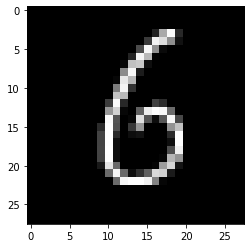

In [337]:
data2 = Numbers2('./mnist.pklz')
print(data2.train_y[:10])
def view_digit(example, label=None):
    if label is not None: print("true label: {:d}".format(label))
    plt.imshow(example.reshape(28,28), cmap='gray');
view_digit(data2.train_x[18],data2.train_y[18])

In [345]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


class MultiLogReg:
    
    def __init__(self, X, y, eta = 0.1):
        self.X = self.normalize_data(X)
        #self.X = X
        self.y = self.one_hot_encoding(y)
        self.eta = eta
        self.opt_class = []
        self.opt_weights=np.zeros((self.X.shape[1],10))
      
        
    def one_hot_encoding(self, y):
        # TO DO: Represent the output vector y as a one hot encoding. Create a matrix of dimensions (m X 10) 
        # where m = number of examples, and 10 for number of classes
        # if the class for the ith example is 7, then y[i][7] = 1 and the for k != 7, y[i][k] = 0.
        # where m = number of examples, and 10 for number of classes
        # if the class for the ith example is 7, then y[i][7] = 1 and the for k != 7, y[i][k] = 0.
        enc = [[0 for i in range(10)] for j in range(len(y))]
        for i in range(len(y)):
            enc[i][y[i]] = 1
        enc = np.array(enc)
        return enc
    
        
    def normalize_data(self, X):
        # TO DO: Normalize the feature values of dataset X using the mean and standard deviation of the respective featur
        shape = X.shape
        X = np.reshape(X, (-1,))
        mean = np.mean(X)
        std = np.std(X)
        # Create a new array for storing standardized values
        std_values = list()
        for i in X:
            x_norm = (i - mean) / std
            std_values.append(x_norm)  
        n_array = np.array(std_values)
        ans = np.reshape(n_array,shape)
        return ans
    

        
    def get_optimal_parameters(self):
        # TO DO: This is the main training loop. You will have to find the optimal weights for all 10 models
        # Each model is fit to it's class which is (0-9), and the cost function will be against all of the other 
        # numbers "the rest".
        n = 10
        print("Optimal parameters")
        for i in range(n):
            self.opt_class.append(LogReg(self.X, self.y, self.eta))
            prevacc, prevacc1 = 0, 0
            for epoch in range(100):
                trainX, testX, trainY, testY = train_test_split(self.X, self.y[:,i], train_size = 0.8)
                self.opt_class[i].X = trainX
                self.opt_class[i].y = trainY
                logprob, accuracy = self.opt_class[i].progress(testX, testY, 'mini_batch_update', 20)

                if abs(accuracy - prevacc) < 0.01 and abs(prevacc - prevacc1) < 0.01:
                    print(i , "\t", epoch, "\t", accuracy)
                    self.opt_weights[:,i]=self.opt_class[i].mini_batch_update(20)
                    break
                prevacc1 = prevacc
                prevacc = accuracy

   
    
    def predict(self, test_image, test_label):
        # TO DO: This function should return the probabilities predicted by each of the models for some given 
        # input image. The probabilities are sorted with the most likely being listed first.
        # Return a vector of shape (10, 2) with the first column holding the number and the second column with
        # the probability that the test_image is that number
        probs = np.zeros((10,2))
        ans = np.zeros((10,2))
        for num in range(10):
            a_opt = self.opt_weights[:,num]
            probs[num,0] = num
            probs[num,1] = 1.0/(1.0 + np.exp(-(np.dot(test_image,a_opt))))

        probs = probs[probs[:,1].argsort()[::-1]]
        probs = np.around(probs, decimals=4)
        return probs
            
    



In [346]:
# DO NOT DELETE THIS CELL !!!

In [347]:
# DO NOT DELETE THIS CELL !!!

### QUESTION ###
It is important to know how well your model did on the whole. You need to report the ___accuracy as a percentage___ on the training set and the test set from Numbers2. You should also plot a ___confusion matrix___ for both, just like you did on the last homework and mention the numbers that were misclassified the most. Finally use the predict method to predict the labels for the FIRST 10 instances from the test set, while also plotting the respective images for validation.

Train a MultiLogReg Model in the cell below. DO NOT DELETE THE CELL

In [348]:
# YOUR CODE HERE
#raise NotImplementedError()
nums = MultiLogReg(data2.train_x,data2.train_y)


Compute the accuracy on the train and test data from Numbers2 using the model you trained above. DO NOT DELETE THE CELL

In [349]:
# YOUR CODE HERE
#raise NotImplementedError()
nums.get_optimal_parameters()


Optimal parameters
0 	 2 	 0.9756
1 	 2 	 0.9759
2 	 2 	 0.9513
3 	 2 	 0.9431
4 	 2 	 0.959
5 	 2 	 0.9316
6 	 2 	 0.9687
7 	 2 	 0.96
8 	 2 	 0.9174
9 	 2 	 0.9239


Plot the confusion matrix on Test and Train Data using the model you trained before. DO NOT DELETE THE CELL

In [350]:
# YOUR CODE HERE
#raise NotImplementedError()
C = np.array([])
count={}
testX=data2.test_x
testY=data2.test_y
for i in range(len(testY)):
    val=testY[i]
    if val in count:
        count[val]+=1
    else:
        count[val]=1
        
target_count=len(count)
C = [[0 for x in range(target_count)] for x in range(target_count)]
predicted =[]
for i in range(len(testX)):
    result = (nums.predict(data2.test_x[i],data2.test_y[i]))[0][0]
    predicted.append(result)
actual=[]
actual = [[0 for x in range(len(predicted))] for x in range(len(predicted))]
for i in range(len(testY)):
    actual[i]=testY[i]
            
classes  = np.unique(np.concatenate((actual,predicted)))
C = np.empty((len(classes),len(classes)),dtype=np.int)
for i,a in enumerate(classes):
    for j,p in enumerate(classes):
        C[i,j] = np.where((actual==a)*(predicted==p))[0].shape[0]
print(C)
score = np.sum((C.diagonal()) / C.sum())
print("\n","score", "\t",score)

[[950   0   0   1   2   0   2   1  35   0]
 [  0 688   9   6   0   1   8   0 352   0]
 [ 21   1 697  19  13   0  18  13 204   4]
 [ 34   1  15 801   1   3   3   3 165   4]
 [ 21   2   3  14 710   0   7   4 206  16]
 [ 84   0  12  65   2 316  17   0 397  22]
 [ 18   0   3   0   4   2 861   2  77   0]
 [ 39   4  18  36   4   0   2 893  55  39]
 [  7   2   3  11   1   2   5   3 971   4]
 [ 37   2   4  55   6   3   2  34 213 605]]

 score 	 0.7492


Predict Labels of First 10 datapoints from your test set and also the plot their images in the cell below. DO NOT DELETE THE CELL

Predicted label 	 8.0
true label: 3
Predicted label 	 8.0
true label: 8
Predicted label 	 6.0
true label: 6
Predicted label 	 9.0
true label: 9
Predicted label 	 6.0
true label: 6
Predicted label 	 8.0
true label: 4
Predicted label 	 8.0
true label: 5
Predicted label 	 8.0
true label: 3
Predicted label 	 8.0
true label: 8
Predicted label 	 8.0
true label: 4


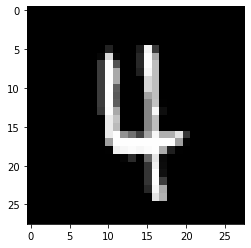

In [351]:
# YOUR CODE HERE
#raise NotImplementedError()
for i in range(10):
    pred = nums.predict(data2.test_x[i],data2.test_y[i])
    print("Predicted label","\t", pred[0][0])
    view_digit(data2.test_x[i],data2.test_y[i])